### Анализ тональности текстов

### Загрузка данных и пакетов

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [43]:
print(df.shape)

(41157, 6)


### Вывод случайных значений и обзор датафрейма

In [44]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11389,15188,60140,"London, UK",20-03-2020,Now the list of UK key workers includes those ...,Negative
16724,20523,65475,london~surbiton~leigh-on-sea,22-03-2020,A lovely local cafe just bought us round a fre...,Extremely Positive
9171,12970,57922,Buenos Aires,20-03-2020,Argentina has locked down. Citizens can visit ...,Neutral
5826,9625,54577,Wirral,19-03-2020,Social care needs more money so that we can pa...,Negative
31818,35617,80569,London,07-04-2020,If anyone has noticed pasta is returning back ...,Positive
10789,14588,59540,Texas,20-03-2020,Did you know there are bogus people products a...,Extremely Positive
38211,42010,86962,NaN,11-04-2020,iTV Foundation has donated 1500 3layered masks...,Extremely Positive
32641,36440,81392,"Keremeos, British Columbia",07-04-2020,COVID-19: Penticton food bank sees Âsubstanti...,Positive
3943,7742,52694,"Washington, DC",18-03-2020,24 Pictures That Prove Americans Have No Idea ...,Positive
2886,6685,51637,NaN,18-03-2020,$KOPN COVID-19 just spawned mass market for VR...,Neutral


In [45]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

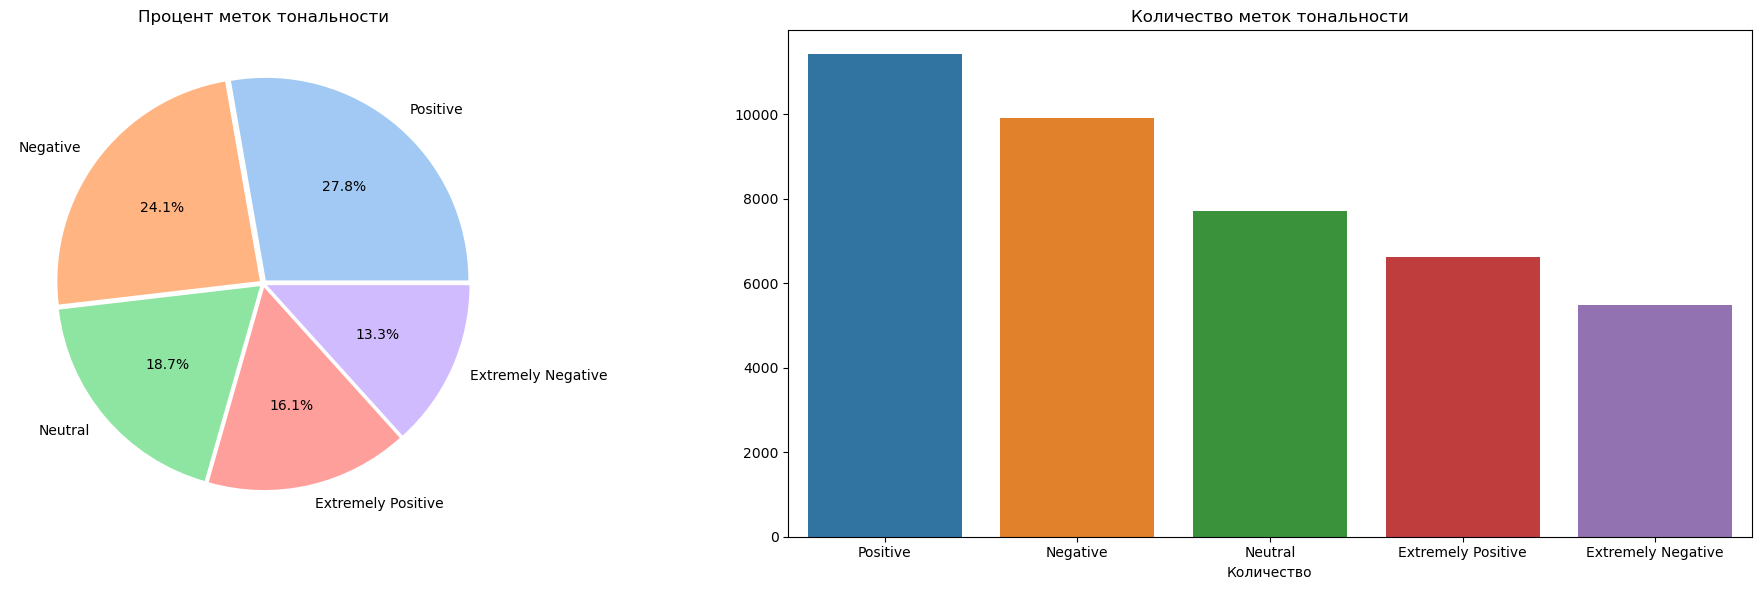

In [48]:
label_count = df['Sentiment'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors = color, explode=explode)
axes[0].set_title('Процент меток тональности')

sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Количество меток тональности')
axes[1].set_xlabel('Метка')
axes[1].set_xlabel('Количество')

plt.tight_layout()
plt.show()

### Подсчет длины сообщений

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


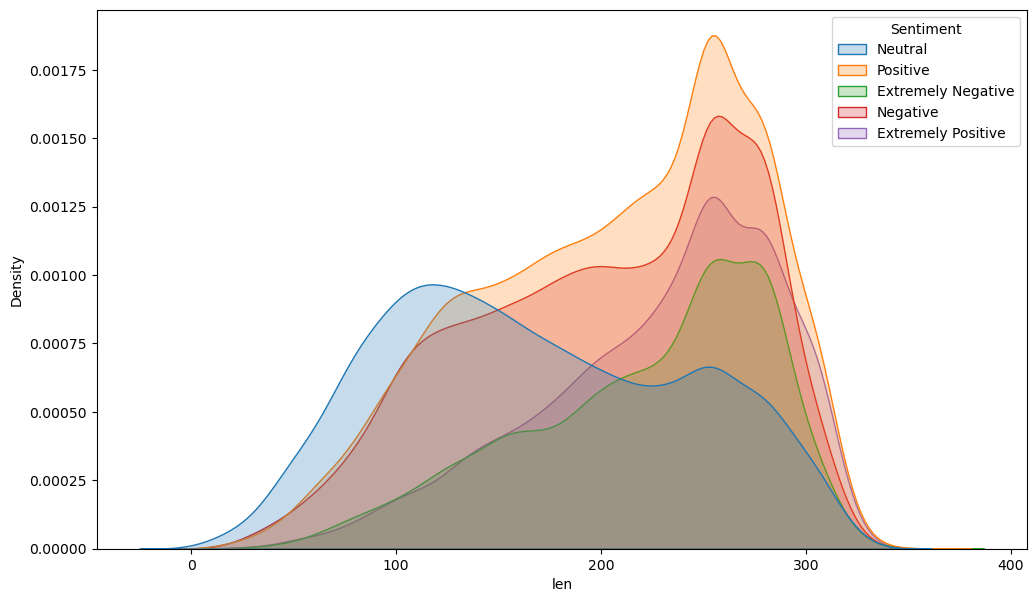

In [49]:
df['len'] = df['OriginalTweet'].apply(len)

plt.figure(figsize=(12,7))
sns.kdeplot(df, x=df['len'], fill=True, hue='Sentiment')
plt.show()

### Bag of Words Мешок слов

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df['OriginalTweet'])

In [51]:
matrix.toarray()[:10, :5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [52]:
cv.get_feature_names_out()[:20]

array(['00', '000', '0000', '0000009375', '0000hrs', '000162', '00042',
       '000cr', '000francs', '000ksh', '000pcs', '000s', '000th', '000â',
       '0010', '0016', '0025450557', '0026691661', '005', '006'],
      dtype=object)

In [53]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [54]:
print(word_matrix)

       00  000  0000  0000009375  0000hrs  000162  00042  000cr  000francs  \
0       0    0     0           0        0       0      0      0          0   
1       0    0     0           0        0       0      0      0          0   
2       0    0     0           0        0       0      0      0          0   
3       0    0     0           0        0       0      0      0          0   
4       0    0     0           0        0       0      0      0          0   
...    ..  ...   ...         ...      ...     ...    ...    ...        ...   
41152   0    0     0           0        0       0      0      0          0   
41153   0    0     0           0        0       0      0      0          0   
41154   0    0     0           0        0       0      0      0          0   
41155   0    0     0           0        0       0      0      0          0   
41156   2    0     0           0        0       0      0      0          0   

       000ksh  ...  zzxwzxhc2v  zzz  zzzz  zâ  zã  zã¼rich  â² 

### Часто встречающиеся слова

In [55]:
df_sum = word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=["Frequency"])

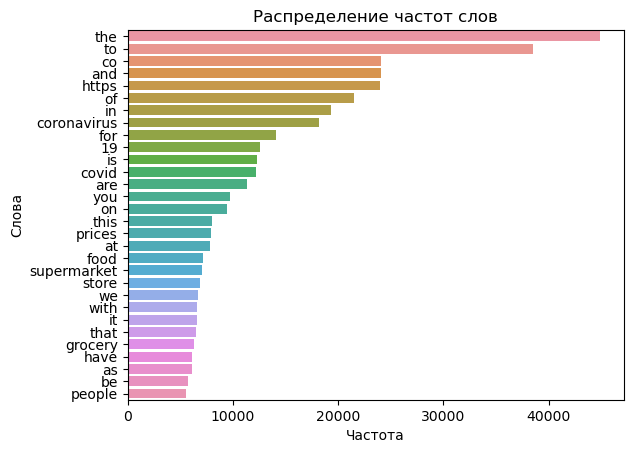

In [56]:
sns.barplot(x=bow['Frequency'], y=bow.index)
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Распределение частот слов')
plt.show()

### Слова по оценке тональности

In [57]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Визуальная оценка частоты встречаемости

In [58]:
def create_freq_dist_plot(text):
    text = df[df['Sentiment'] == text]
    word_text = ' '.join(txt for txt in text['OriginalTweet'])

    tokens = word_tokenize(word_text)

    freq_dist = FreqDist(tokens)

    word_plot = freq_dist.plot(40, cumulative=False, linewidth=0.8, marker='o', color='red')
    plt.show()

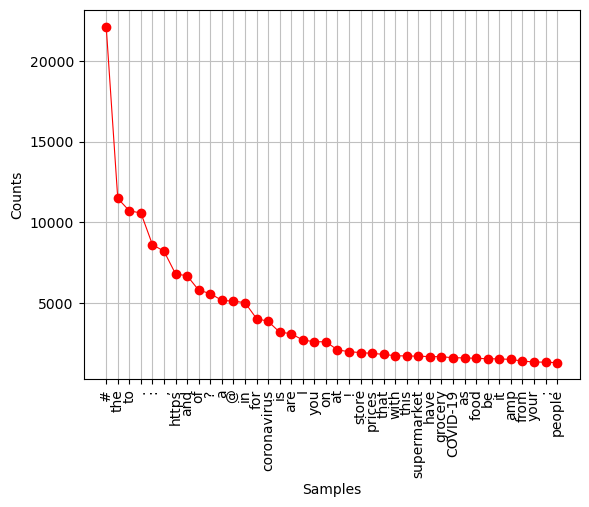

In [59]:
create_freq_dist_plot('Positive')

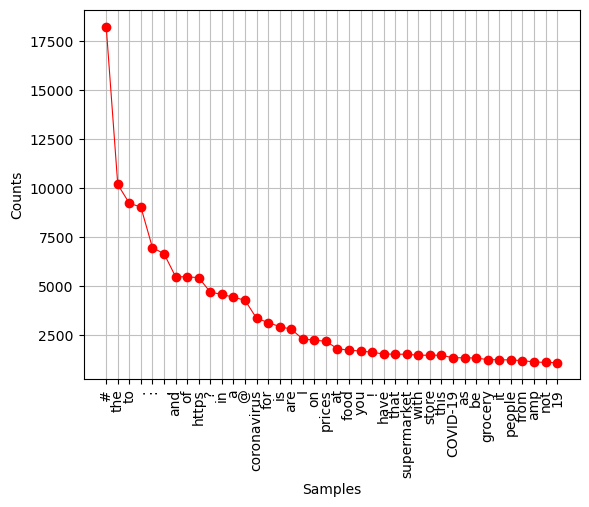

In [60]:
create_freq_dist_plot('Negative')

### Очистка данных

In [61]:
import string
import nltk
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-z'A-Z]", " ", text)
    text = re.sub(r"\s+ [^a-z'A-Z]\s+", " ", text+ " ")
    text = ''.join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub('\s[\s]+', ' ', text).strip()
    return text



In [62]:
df['new_text'] = df['OriginalTweet'].apply(clean_text)

In [63]:
df['OriginalTweet'].iloc[150]

'How come #TrumpIsAnIdiot or #trumpneedstoshutup is not trending?? For real!! People are freaked, stores canÂ\x92t keep food on their shelf, and the stock market is out of control. @realDonaldTrump please for the sake of the county shut up. #coronavirus'

In [64]:
df['new_text'].iloc[150]

'come trumpisanidiot trumpneedstoshutup trending real people freaked stores keep food shelf stock market control please sake county shut coronavirus'

### Стемминг

In [65]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
words = word_tokenize(df['new_text'].iloc[1])
for w in words:
    print(w, ':', ps.stem(w))

advice : advic
talk : talk
neighbours : neighbour
family : famili
exchange : exchang
phone : phone
numbers : number
create : creat
contact : contact
list : list
phone : phone
numbers : number
neighbours : neighbour
schools : school
employer : employ
chemist : chemist
set : set
online : onlin
shopping : shop
accounts : account
poss : poss
adequate : adequ
supplies : suppli
regular : regular
meds : med
order : order


In [66]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df['new_text'].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df['Stemmed'] = stemmed
df.head()

,OriginalTweet,Sentiment,len,new_text,Stemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,[]
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...,"[coronaviru, australia, woolworth, give, elder..."
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...,"[food, stock, one, empti, pleas, dont, panic, ..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,ready supermarket covid outbreak paranoid food...,"[readi, supermarket, covid, outbreak, paranoid..."


In [67]:
df['Stemmed'] = df['Stemmed'].apply(' '.join)
df.head()

,OriginalTweet,Sentiment,len,new_text,Stemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,ready supermarket covid outbreak paranoid food...,readi supermarket covid outbreak paranoid food...


### Классификация

### Наивный Байес

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df['Stemmed']
y, class_names = pd.factorize(df['Sentiment'], sort=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

In [70]:
pipe_1 = Pipeline([('vectorizer', TfidfVectorizer()), ('classifire', MultinomialNB(alpha=0.005))])
pipe_1.fit(X_train, y_train)
y_pred = pipe_1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.429421768707483
                    precision    recall  f1-score   support

Extremely Negative       0.49      0.32      0.38      1096
Extremely Positive       0.50      0.31      0.39      1325
          Negative       0.40      0.48      0.43      1983
           Neutral       0.55      0.34      0.42      1543
          Positive       0.39      0.56      0.46      2285

          accuracy                           0.43      8232
         macro avg       0.46      0.40      0.42      8232
      weighted avg       0.45      0.43      0.42      8232



### Логистическая регрессия

In [72]:
from sklearn.linear_model import LogisticRegression
pipe_2 = Pipeline([('vectorizer', TfidfVectorizer()), ('classifire', LogisticRegression())])
pipe_2.fit(X_train, y_train)
y_pred = pipe_2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.5832118561710399
                    precision    recall  f1-score   support

Extremely Negative       0.65      0.48      0.55      1096
Extremely Positive       0.69      0.56      0.62      1325
          Negative       0.53      0.55      0.54      1983
           Neutral       0.63      0.67      0.65      1543
          Positive       0.53      0.61      0.57      2285

          accuracy                           0.58      8232
         macro avg       0.61      0.58      0.59      8232
      weighted avg       0.59      0.58      0.58      8232



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
